In [1]:
# swan-ns corrie run --> p:\archivedprojects\11209278-005-mad09a-2023-swannz\05 SWAN\05_base\DCSM-corrie-original\output\
# /p/archivedprojects/11209278-005-mad09a-2023-swannz/05\\ SWAN/05_base/DCSM-corrie-original/output/
import os
import sys
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from datetime import datetime, timedelta
import cartopy.crs as ccrs

project_root = os.path.abspath('/p/i1000617-phd-waveda/dev/satwavepy/src/')
sys.path.append(project_root)
print(project_root)

from satwavepy.vizualize.utils import figure_setup, plot_zebra_border, setup_custom_lat_formatter,create_projection,create_figure_and_axes,add_features, add_model_limits


/p/i1000617-phd-waveda/dev/satwavepy/src


In [2]:
# Swan map file
base_path = r"/p/archivedprojects/11209278-005-mad09a-2023-swannz/05 SWAN/05_base/DCSM-corrie-original/output"
swan_map_file = 'swan2D.nc'

swan_2d = xr.open_dataset(os.path.join(base_path, swan_map_file))

In [3]:
swan_2d

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 167, longitude: 421, latitude: 481)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2022-01-27 ... 2022-02-02T22:00:00
  * longitude  (longitude) float32 2kB -12.0 -11.95 -11.9 ... 8.9 8.95 9.0
  * latitude   (latitude) float32 2kB 48.0 48.03 48.07 48.1 ... 63.93 63.97 64.0
Data variables:
    hs         (time, latitude, longitude) float32 135MB ...
    botl       (time, latitude, longitude) float32 135MB ...
    hswe       (time, latitude, longitude) float32 135MB ...
    tmm10      (time, latitude, longitude) float32 135MB ...
    tps        (time, latitude, longitude) float32 135MB ...
    theta0     (time, latitude, longitude) float32 135MB ...
    spread     (time, latitude, longitude) float32 135MB ...
    ssh        (time, latitude, longitude) float32 135MB ...
    xcur       (time, latitude, longitude) float32 135MB ...
    ycur       (time, latitude, longitude) float32 135MB ...
    xwnd       (time, latitude, longitude) float32 135MB ...
    ywnd       (time, latitude, longitude) float32 135MB ...
Attributes:
    Conventions:             CF-1.5
    History:                 Created with agioncmd version 1.5
    Directional_convention:  nautical
    project:                 SWAN-KS
    run:                     001

<Figure size 1920x1440 with 0 Axes>

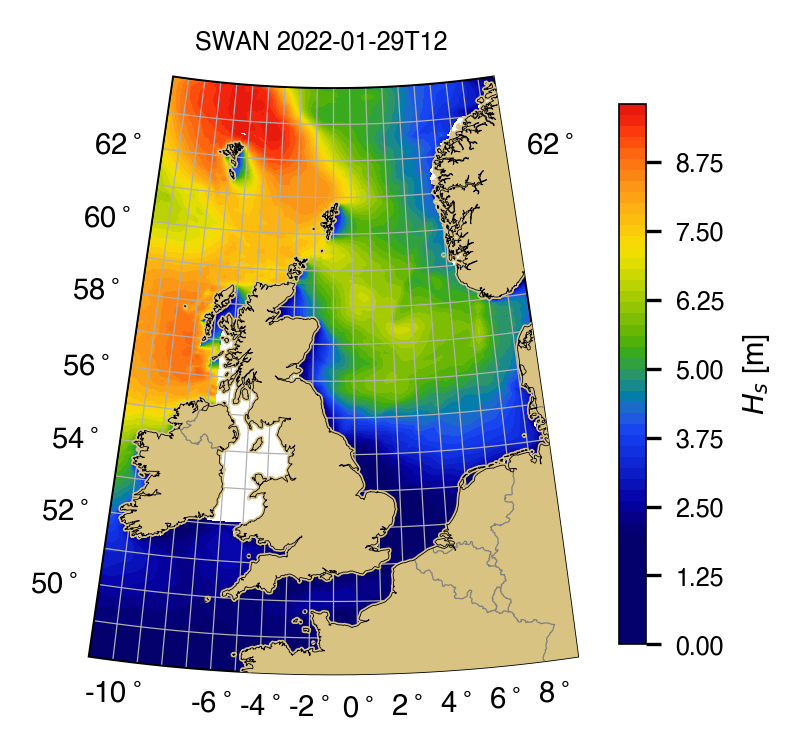

In [27]:
# setup figures
plt.clf()

figure_setup()

# Custom orhtographic projection
custom_lat_formatter = setup_custom_lat_formatter()
noProj, myProj = create_projection(model_extent='dcsm')
fig = plt.figure(figsize=(3.5433,2.6)) # (3.5433, 2.6)
ax = fig.add_subplot(1, 1, 1, projection=myProj)
ax, gl = add_features(ax)
extent = [-11.0, 9, 48, 64]  # Set the desired extent
offset = -2
polygon1s = plot_zebra_border(ax, noProj, myProj, extent, model_extent='dcsm')  

# Settings
CBAR_SHRINK = 0.9
colormap_hs = cc.cm.rainbow4
vmin = 2
vmax = 10
index = 60
start_date = datetime(2022, 1, 27) 
end_date = datetime(2022, 1, 28)  
offset=1

contours = ax.contourf(swan_2d.longitude + offset, swan_2d.latitude, swan_2d.hs.isel(time=index), levels=np.arange(0, 10.0, 0.2), cmap=colormap_hs, vmin=vmin, vmax=vmax, transform=noProj)
cbar = fig.colorbar(
        contours, ax=ax, shrink=CBAR_SHRINK, ticks=np.linspace(0, 10, 9)
    )
cbar.set_label("$H_s$ [m]")
ax.set_title(f"SWAN {str(swan_2d.time.isel(time=index).values)[:-16]}", fontsize=6)

# Little hack needed to plot labels correctly
# for ear in gl.ylabel_artists:
#     print(ear.get_position()[0])
#     right_label = ear.get_position()[0] > 843721.9976153243
#     if right_label:
#         ear.set_visible(False)
#     else:
#         ear.set_visible(True)
        
# for eat in gl.xlabel_artists:
#     print(eat.get_position()[1])
#     top_label = eat.get_position()[1] > -09313.5629333823
#     if top_label:
#         eat.set_visible(False)
#     else:
#         eat.set_visible(True)



gl.rotate_labels = False

gl.top_labels = gl.right_labels = False




plt.draw()

# fig.tight_layout()

plt.show()